# Deep Learning - Olifantenherkenning

### Van: Mart Veldkamp

# Inhoudsopgave

1. [Inleiding](#1)
2. [Het probleem](#2)
3. [Library's laden + data ophalen](#ophalen)
    - [Versie's van de verschillende library's](#versie)
4. [Data visualiseren](#visualiseren)
5. [Model laden](#3)
6. [Classificeer foto's met ResNet50](#4)
7. [Conclusie](#5)
8. [Bronnen](#6)

# 1. Inleiding <a class='anchor' id='1'></a>

Deze opdracht is onderdeel van het overkoepelende vak Deep Learning, dit is één van de meerdere opgaves die ik gebruik in dit vak om te laten zien hoe deep learning gebruikt kan worden voor verschillende doeleinde. Al deze opgaves zijn daarom ook op de lossen door middel van Deep Learning.

Alle code in deze opdrachten zijn van mijzelf, gebasseerd op code uit de lessen, of waar ik zelf vast liep gebaseerd op code snippets van het internet. Mocht het toch voorkomen dat er code 1 op 1 is overgenomen, dan staat dit vermeld in de bronnen

# 2. Het probleem <a class='anchor' id='2'></a>

Het probleem dat ik in deze notebook ga behandelen is het bepalen of een foto van een olifant ook geclassificeerd woord als olifant door een CNN. En daarbij concluderen waarom de ene foto van een olifant misschien beter geclassificeerd woordt dan een andere foto.

# 3. Library's laden + data ophalen <a class='anchor' id='ophalen'></a>

Deze dataset is afkomstig van DLO

In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.image import imread

from sklearn.datasets import load_sample_image
import tensorflow as tf
from tensorflow import keras

## Versie's van de verschillende library's <a class='anchor' id='versie'></a>

In [6]:
print("Versie van Keras:", keras.__version__)
print("Versie van Numpy:", np.__version__)
print("Versie van matplotlibrary:",matplotlib. __version__)
print("Versie van opencv:",cv2.__version__)

Versie van Keras: 2.6.0
Versie van Numpy: 1.19.5
Versie van matplotlibrary: 3.2.0
Versie van opencv: 4.5.3


# 4. Data visualiseren <a class='anchor' id='visualiseren'></a>

(9, 224, 224, 3)


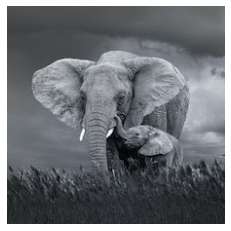

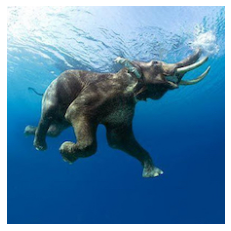

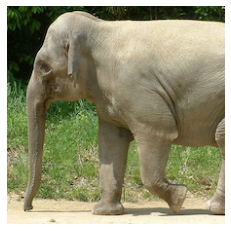

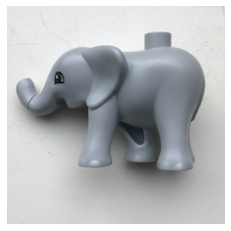

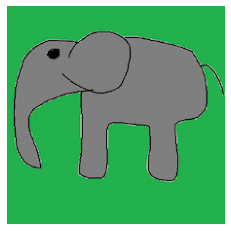

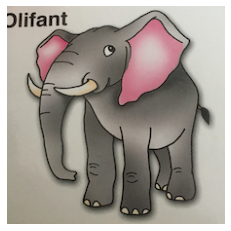

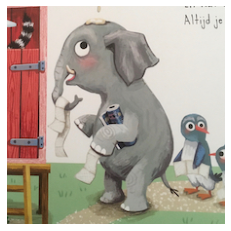

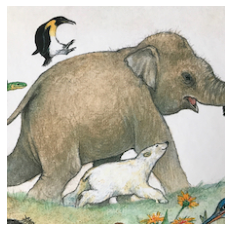

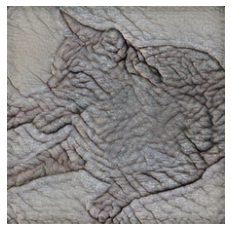

In [7]:
olifant1 = imread("fotos/olifant_foto1.jpg") 
olifant2 = imread("fotos/olifant_foto2.jpg") 
olifant3 = imread("fotos/olifant_foto3.jpg") 
olifant4 = imread("fotos/olifant_speelgoed1.jpg") 
olifant5 = imread("fotos/olifant_tekening1.jpg") 
olifant6 = imread("fotos/olifant_tekening2.jpg") 
olifant7 = imread("fotos/olifant_tekening3.jpg") 
olifant8 = imread("fotos/olifant_tekening4.jpg") 
olifant9 = imread("fotos/kat_foto1.jpg") 

olifant1.shape
images = np.array([olifant1, olifant2, olifant3, olifant4, olifant5, olifant6, olifant7, olifant8, olifant9])

batch_size, height, width, channels = images.shape
print(images.shape)

for i in range(len(images)):
    plt.imshow(images[i, :, :, :])
    plt.axis("off") 
    plt.show()


# 5. Model laden <a class='anchor' id='3'></a>

Het model wat ik ga gebruiken is genaamd ResNet50

In [8]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")

# 6. Classificeer foto's met ResNet50 <a class='anchor' id='4'></a>

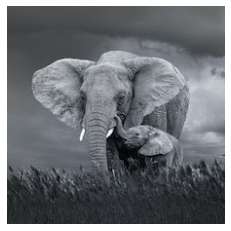

Image #0
  n02504458 - African_elephant 81.85%

  n01871265 - tusker       9.64%

  n02412080 - ram          3.16%

  n02415577 - bighorn      2.96%

  n02504013 - Indian_elephant 2.02%



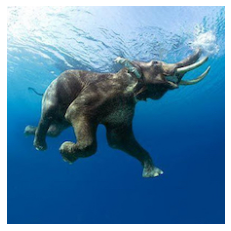

Image #1
  n10565667 - scuba_diver  68.42%

  n02074367 - dugong       4.59%

  n04251144 - snorkel      4.58%

  n09256479 - coral_reef   3.09%

  n01494475 - hammerhead   2.37%



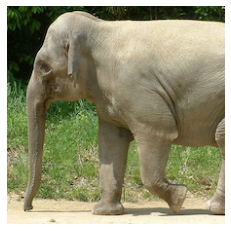

Image #2
  n02504013 - Indian_elephant 96.99%

  n01871265 - tusker       1.95%

  n02504458 - African_elephant 0.95%

  n01704323 - triceratops  0.06%

  n02398521 - hippopotamus 0.01%



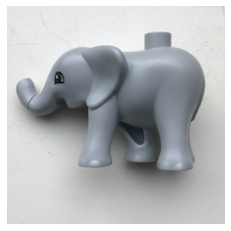

Image #3
  n03935335 - piggy_bank   55.65%

  n03908714 - pencil_sharpener 27.55%

  n04131690 - saltshaker   3.83%

  n04254120 - soap_dispenser 2.95%

  n03598930 - jigsaw_puzzle 1.00%



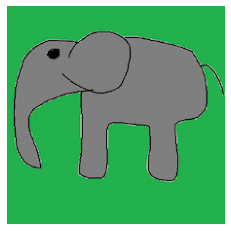

Image #4
  n02165105 - tiger_beetle 17.70%

  n03291819 - envelope     12.31%

  n07248320 - book_jacket  9.92%

  n03595614 - jersey       9.31%

  n06596364 - comic_book   5.49%



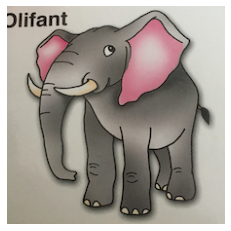

Image #5
  n02910353 - buckle       33.05%

  n06596364 - comic_book   10.24%

  n04548280 - wall_clock   8.27%

  n03724870 - mask         5.57%

  n03063599 - coffee_mug   3.71%



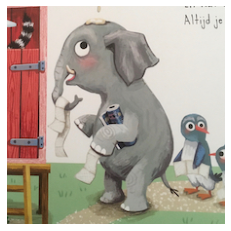

Image #6
  n03887697 - paper_towel  37.64%

  n04399382 - teddy        11.58%

  n04458633 - totem_pole   7.00%

  n04462240 - toyshop      5.72%

  n04070727 - refrigerator 5.45%



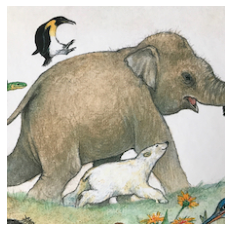

Image #7
  n02504013 - Indian_elephant 34.03%

  n02504458 - African_elephant 30.31%

  n02113978 - Mexican_hairless 9.10%

  n02129165 - lion         6.36%

  n01871265 - tusker       2.74%



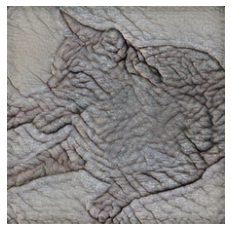

Image #8
  n02504458 - African_elephant 52.09%

  n02504013 - Indian_elephant 32.43%

  n01871265 - tusker       15.48%

  n01704323 - triceratops  0.00%

  n02397096 - warthog      0.00%



In [9]:
inputs = keras.applications.resnet50.preprocess_input(images)

Y_proba = model.predict(inputs, steps=1)

top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=5)

for image_index in range(len(images)):
    plt.imshow(images[image_index, :, :, :])
    plt.axis("off") 
    plt.show()
    
    print("Image #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
        print()

# 7. Conclusie <a class='anchor' id='5'></a>
De conclusie die we kunnen trekken uit dit experiment is dat een CNN 
beter is in het detecteren van normale foto’s dan op “aparte foto’s”, wat 
hiermee bedoeld wordt is dat wanneer een model getraind wordt  om een 
Afrikaanse olifant met alleen maar foto’s van een olifant die in de savanne 
loopt. Hij moeilijk een Olifant kan herkennen die in het water zwemt, zoals 
eerder aangegeven.


Dit kan bijvoorbeeld komen omdat het CNN denkt dat een Afrikaanse 
olifant alleen kan bestaan in een savanne omgeving. Dus als hij deze in 
een ander klimaat tegen komt. Hij waarschijnlijk het niet meer associeert 
met een olifant.

# 8. Bronnen: <a class='anchor' id='6'></a>

1. [keras model](https://keras.io/api/applications/)